In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\ML\regularization\gender_classification_v7.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [6]:
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [7]:
len(dataset)

5001

In [8]:
dataset.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [9]:
len(dataset.columns)

8

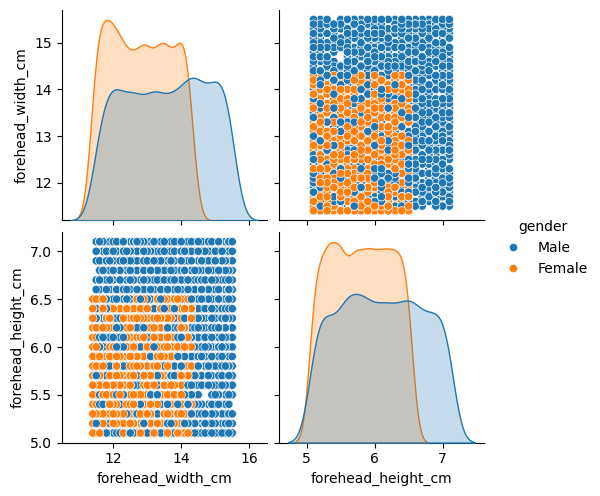

In [11]:
sns.pairplot(dataset[['forehead_width_cm','forehead_height_cm','gender']],hue='gender')
plt.show()

<Axes: xlabel='long_hair', ylabel='count'>

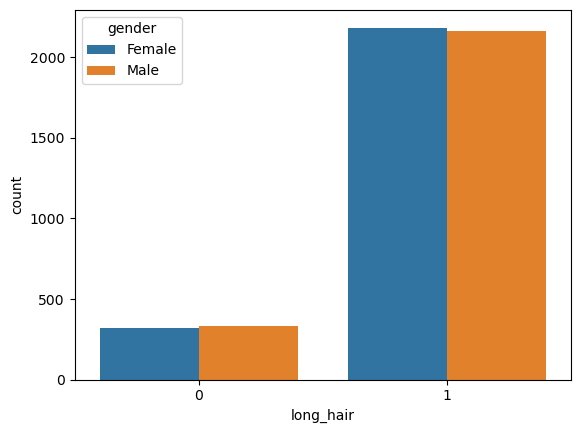

In [13]:
sns.countplot(data = dataset, x='long_hair', hue ='gender')

<Axes: xlabel='nose_wide', ylabel='count'>

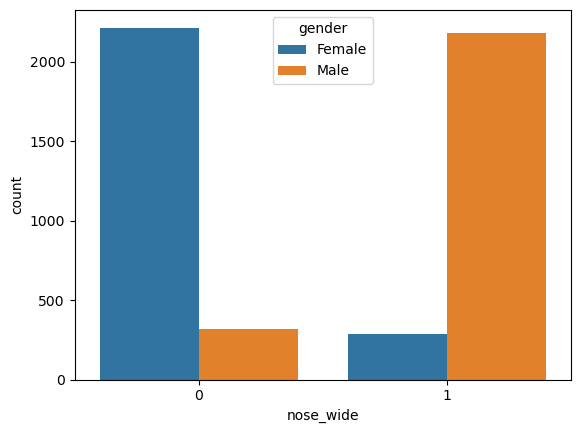

In [14]:
sns.countplot(data = dataset , x='nose_wide', hue = 'gender')

<Axes: xlabel='nose_long', ylabel='count'>

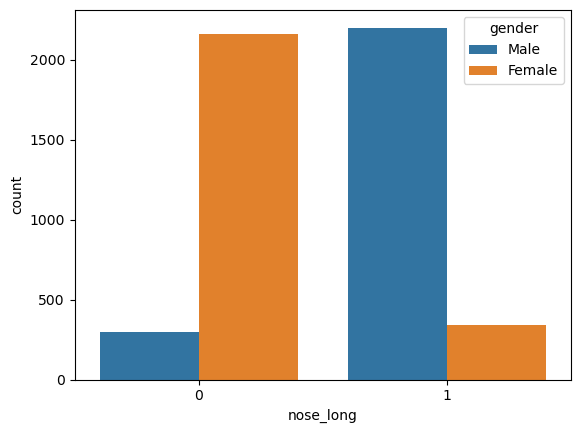

In [16]:
sns.countplot(data = dataset, x= 'nose_long', hue ='gender')

<Axes: xlabel='lips_thin', ylabel='count'>

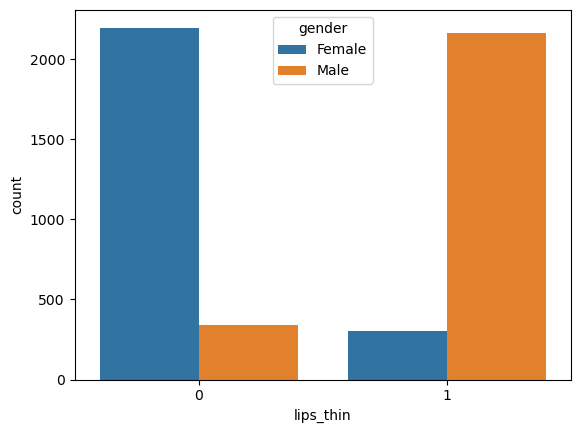

In [18]:
sns.countplot(data = dataset , x= 'lips_thin' , hue ='gender')

<Axes: xlabel='distance_nose_to_lip_long', ylabel='count'>

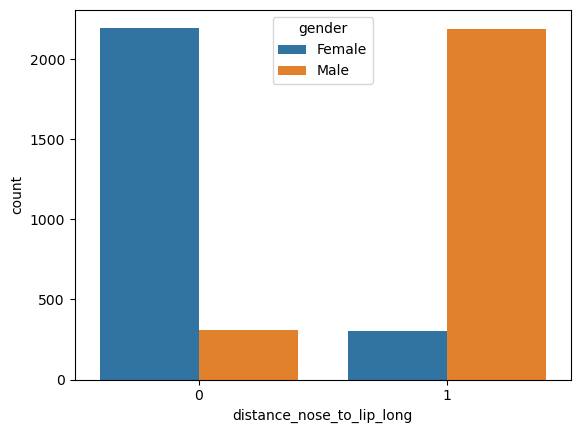

In [19]:
sns.countplot(data = dataset , x='distance_nose_to_lip_long', hue ='gender')

In [23]:
dataset.isnull().sum()/len(dataset)*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [24]:
# encoding and feature scaling


In [30]:
from sklearn.preprocessing import StandardScaler
def data_type(dataset):
    numerical=[]
    categorical=[]
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical , categorical
    

In [31]:
numerical , categorical = data_type(dataset)

In [35]:
len(numerical)

7

In [34]:
len(categorical)

1

In [36]:
len(dataset.columns)

8

In [41]:
def binary_columns(df):
    binary_cols=[]
    for col in df.select_dtypes(include=['int','float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values,[0,1]).all():
            binary_cols.append(col)
    return binary_cols

In [42]:
binary_cols = binary_columns(dataset)

In [43]:
binary_cols

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

In [44]:
len(binary_cols)

5

In [45]:
#removing binary columns from numerical columns


In [46]:
numerical = [i for i in numerical if i not in binary_cols]

In [47]:
numerical

['forehead_width_cm', 'forehead_height_cm']

In [50]:
categorical

['gender']

In [51]:
numerical

['forehead_width_cm', 'forehead_height_cm']

In [52]:
def encoding(dataset , categorical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    
    for i in categorical:
        dataset[i]=dataset[i].astype('category')
        dataset[i]= dataset[i].cat.codes
    return dataset

In [53]:
dataset = encoding(dataset , categorical)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int8   
dtypes: float64(2), int64(5), int8(1)
memory usage: 278.5 KB


In [55]:
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

In [56]:
dataset = feature_scaling(dataset, numerical)

In [57]:
dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247933,0.283971,1,0,1,1,1
1,0,0.739389,-1.009418,0,0,1,0,0
2,0,-1.247933,0.653511,1,1,1,1,1
3,0,1.100720,0.283971,0,1,1,1,1
4,1,0.287725,-0.085568,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,0.378057,-1.563727,0,0,0,0,0
4997,1,-1.157600,-1.009418,0,0,0,0,0
4998,1,-0.254272,-0.455108,0,0,0,0,0
4999,1,0.016726,0.468741,0,0,0,0,0


In [64]:
# spliting independent and dependent variable
x = dataset.iloc[:,0:7].values

In [65]:
#dependent
y=dataset.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.30)

In [67]:
from sklearn.linear_model import LogisticRegression
logmodel_ini = LogisticRegression()
logmodel_ini.fit(x_train , y_train)

LogisticRegression()

In [69]:
y_pred_ini = logmodel_ini.predict(x_test)

In [74]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , log_loss , roc_curve , auc , RocCurveDisplay , PrecisionRecallDisplay , ConfusionMatrixDisplay

In [75]:
accuracy_score(y_test ,y_pred_ini)

0.9706862091938707

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'show'

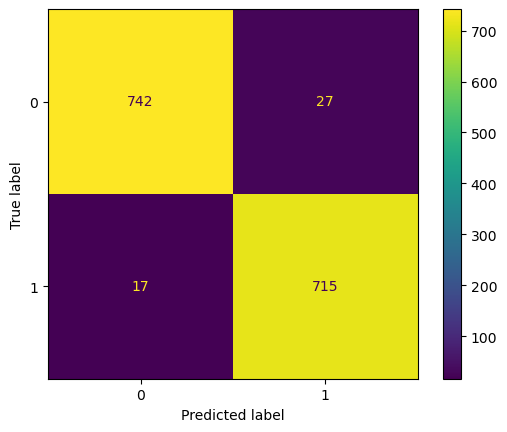

In [77]:
cm = confusion_matrix(y_test,y_pred_ini, labels = logmodel_ini.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm , display_labels=logmodel_ini.classes_).plot().show()

AttributeError: 'RocCurveDisplay' object has no attribute 'show'

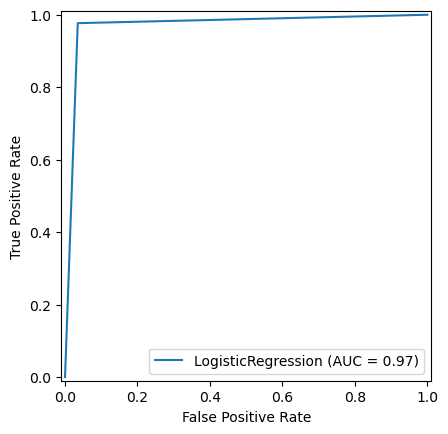

In [80]:
fpr , tpr , threshodls = roc_curve(y_test , y_pred_ini)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr = fpr, tpr=tpr,roc_auc=roc_auc,estimator_name ='LogisticRegression').plot().show()

In [81]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,logmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      0.96      0.97       769
 Positive(1)       0.96      0.98      0.97       732

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [83]:
log_loss(y_test, logmodel_ini.predict(x_test))

1.056576115337212